# Assignment 7
## Numerical Integration

1. Based on Trapezoid Rule*
2. Based on Simpson's $\frac{1}{3}$ Rule*
3. Based on Gauss-Legendre Quadrature**

Number of Panel =  \*{4,8,16,30}, \**{2}

### The function of integration is:
$$
\int_{1}^{\Pi} \frac{\ln{x}}{x^2-2x-2} dx
$$

#### Solving Steps
To create a logarthmic function, We need to import _numpy_ to calcualte the normal logarithmic

In [1]:
import numpy as np

Then, we need to create the function based on the function that are profided

In [2]:
f = lambda x:np.log(x)/(x**2-2*x+2)

##### Trapezoid Rule's Integration
The calculation of the numerical are based on the fact that two point will create a trapezium. This colerate small trapezium, if are enough, will be sum out than the result is closed to the area of the graph.

In [3]:
def trapIntegrat(fx=f,a=1,b=np.pi,n=10000):
    #number of point
    x = np.linspace(a,b,n+1)
    y = fx(x)
    return abs(0.5*(b-a)*(y[0]+2*sum(y[1:-1])+y[-1]))/n

In [4]:
print(trapIntegrat(n=4))
print(trapIntegrat(n=8))
print(trapIntegrat(n=16))

0.558100997307471
0.5783432199113311
0.5832985470864485


##### Simpsion's $\frac{1}{3}$ Rule's Integration
$$
\sum\limits_{k=1}^n \frac{h}{3}[f(x_1)+4f(x_2)+2f(x_3)+....+4f(x_{n-1})+f(x_n)]
$$

In [5]:
#iteration
def simpIntegrat(fx=f,a=1,b=np.pi,n=10000):
    x = np.linspace(a,b,n+1)
    y = fx(x)
    res = y[0]+y[-1]
    for i in range(1,n): res += (2+2*(i%2))*y[i]
    return res*abs(x[0]-x[1])/3

#linear vector
def simpIntegrat2(fx=f, a=1, b=np.pi, n=10000):
    x = np.linspace(a,b,n+1)
    w = np.ones(n+1)
    w[1:-1:2] = 4
    w[2:-2:2] = 2
    return sum(w*fx(x))*abs(x[0]-x[1])/3

##### Gauss-Legendre Quadrature Rule's Integration

$$\int_{-1}^{1}f(x)dx \approx \frac{b-a}{2}\sum\limits_{i=1}^n a_if(x_i)$$

Where X equals to
$$ x = \frac{b+a}{2}+\frac{b-a}{2}\xi$$

Where $\xi$ are taken from

Nodes and weights for Gauss–Legendre quadrature

| n |     $\xi_i$   |  $a_i$   |
|:-:|:-------------:|:--------:|
| 1 |  $\pm$0.57735 |     1    |
| 2 |       0       | 0.888889 |
|   | $\pm$0.774597 | 0.555556 |
| 3 | $\pm$0.339981 | 0.652145 |
|   | $\pm$0.861136 | 0.347855 |
| 4 | 0             | 0.568889 |
|   | $\pm$0.538469 | 0.478629 |
|   | $\pm$0.90618  | 0.236927 |


In [6]:
def gausIntegrat(fx=f, a=1, b=np.pi,n=3):
    #The data are taken from https://en.wikipedia.org/wiki/Gaussian_quadrature
    #multiple data of array that are equivalent from the table
    zeta = np.array([np.array([0]),np.array([0.57735]),np.array([0,0.774597]),np.array([0.339981,0.861136]),np.array([0,0.538469,0.90618])])
    ai = np.array([np.array([2]),np.array([1]),np.array([0.888889,0.555556]),np.array([0.652145,0.347855]),np.array([0.568889,0.478629,0.236927])])
    
    # join positive and negative condition of the zeta & ai >> np.concatenate
    if zeta[n][0] == 0 :
        x = (b+a)/2 +(b-a)/2*np.concatenate([zeta[n],(-1*zeta[n][1:n])])
        return ((b-a)/2)*sum(fx(x)*np.concatenate([ai[n],ai[n][1:n]]))
    else:
        x = (b+a)/2 +(b-a)/2*np.concatenate([zeta[n],(-1*zeta[n])])
        return ((b-a)/2)*sum(fx(x)*np.concatenate([ai[n],ai[n]]))

To explain the way the three of them differs from one another, we need to use matplotlib to re-enginered the step that are taken.

In [7]:
import matplotlib.pyplot as plt

For trapezoid and simpson's 1/3 rule, we used the nop of 0,4,8,16 and 30. We have to create a array then calculate it.

In [8]:
nArray = [4,8,16,30]
trapArray = []
simpArray = []
for i in nArray:
    trapArray.append(trapIntegrat(n=i))
    simpArray.append(simpIntegrat2(n=i))
print("Trapezoid     : ",trapArray)
print("Simpson's 1/3 : ",simpArray)

Trapezoid     :  [0.558100997307471, 0.5783432199113311, 0.5832985470864485, 0.5844754723922773]
Simpson's 1/3 :  [0.5865257193213259, 0.5850906274459512, 0.5849503228114875, 0.5849433898707207]


As for the Gaussian quadrature, we can see the changes through the result of n. Since n that corresponding to the n, number of points in the trapezoid and simpson's 1/3 aren't correlated so it's compared not by step as both of them before. So, it's calculated to the n from range of 0 through 4.

In [9]:
gausArray = []
for i in range(2,4):
    gausArray.append(gausIntegrat(n=i))
print("Gaussian quadrature : ",gausArray)

Gaussian quadrature :  [0.5816870356588623, 0.5847681087712879]


Plot all available data,

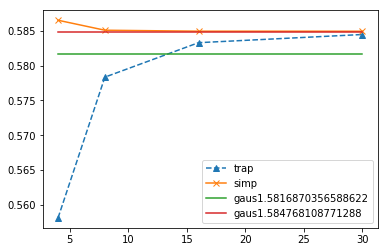

In [10]:
plt.plot(nArray,trapArray,"^--",label="trap")
plt.plot(nArray,simpArray,"x-",label="simp")

n1Array = [4,30]
for i in gausArray:
    plt.plot(n1Array,[i,i],label="gaus"+str(i+1))
plt.legend()
plt.show()